In [0]:
import numpy as np


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [0]:
# MNIST Dataset
original_train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
original_test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor(), download=True)

In [0]:
CUDA = True
BATCH_SIZE = 64

In [0]:
# Define Train loader
train_tensors = original_train_dataset.data.float() / 255
test_tensors = original_test_dataset.data.float() / 255

train_dataset = torch.utils.data.TensorDataset(train_tensors, original_train_dataset.targets)
test_dataset = torch.utils.data.TensorDataset(test_tensors, original_test_dataset.targets)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [0]:
# [CHANGED] Add dropout layer to introduce diversity in gradients
# [CHANGED] [Important] Use LeakyReLU since it keeps gradients better
discriminator = nn.Sequential(
    nn.Dropout(),
    nn.Linear(784, 256),
    nn.LeakyReLU(0.2),
    nn.Linear(256, 128),
    nn.LeakyReLU(0.2),
    nn.Linear(128, 64),
    nn.Dropout(),
    nn.LeakyReLU(0.2),
    nn.Linear(64, 1),
    nn.Sigmoid()
)

In [0]:
# [CHANGED] [Important] Use LeakyReLU since it keeps noise better
generator = nn.Sequential(
    nn.Linear(128, 128),
    nn.LeakyReLU(0.2),
    nn.Linear(128, 256),
    nn.LeakyReLU(0.2),
    nn.Linear(256, 512),
    nn.LeakyReLU(0.2),
    nn.Linear(512, 784),
    nn.Sigmoid()
)

In [0]:
if CUDA:
  discriminator.cuda()
  generator.cuda()

In [0]:
LEARNING_RATE_D = 0.0002
LEARNING_RATE_G = 0.0002


opt_D = optim.Adam(discriminator.parameters(), lr=LEARNING_RATE_D)
opt_G = optim.Adam(generator.parameters(), lr=LEARNING_RATE_G)

In [0]:
N_EPOCH = 100

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 3) # set default size of plots

epoch: 0 	 last batch loss D: 0.052017875015735626 	 last batch loss G: 9.562265396118164


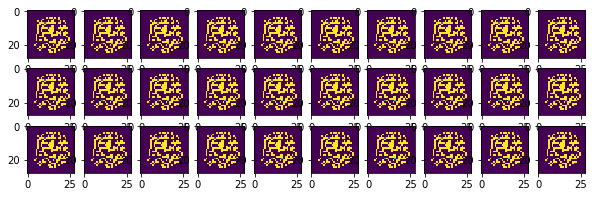

epoch: 1 	 last batch loss D: 0.05213375762104988 	 last batch loss G: 11.217893600463867


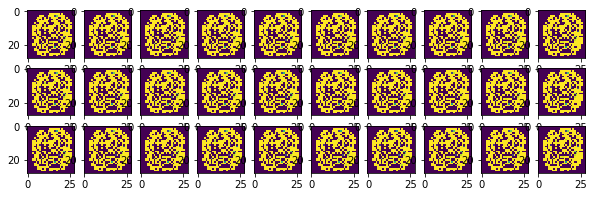

epoch: 2 	 last batch loss D: 9.40137033467181e-05 	 last batch loss G: 19.82182502746582


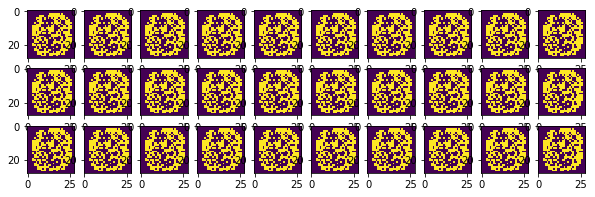

epoch: 3 	 last batch loss D: 0.0011840149527415633 	 last batch loss G: 15.802545547485352


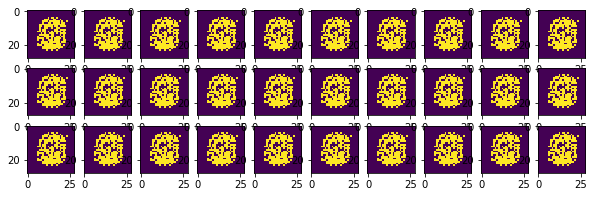

epoch: 4 	 last batch loss D: 4.4480402721092105e-06 	 last batch loss G: 17.143352508544922


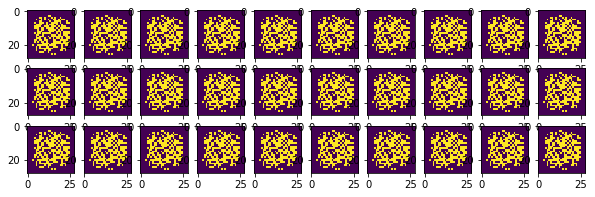

epoch: 5 	 last batch loss D: 5.494821948559547e-07 	 last batch loss G: 20.16681480407715


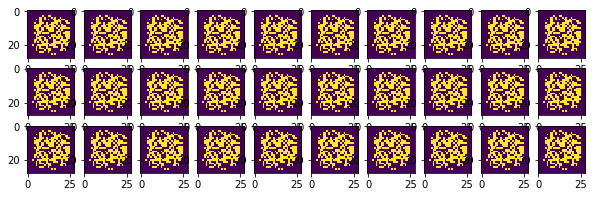

epoch: 6 	 last batch loss D: 1.2824365512642544e-05 	 last batch loss G: 22.071712493896484


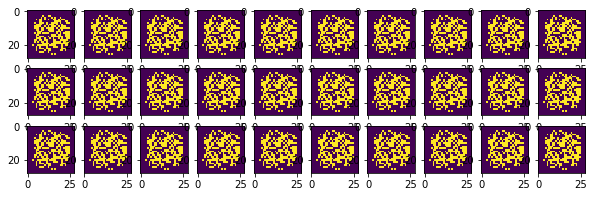

epoch: 7 	 last batch loss D: 0.00013810131349600852 	 last batch loss G: 16.1990966796875


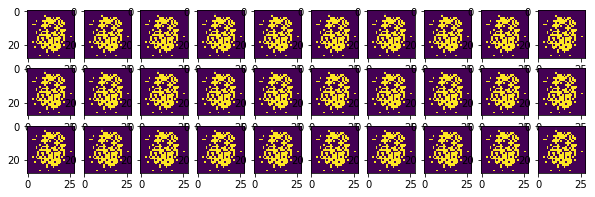

epoch: 8 	 last batch loss D: 7.003583277764847e-07 	 last batch loss G: 20.61200714111328


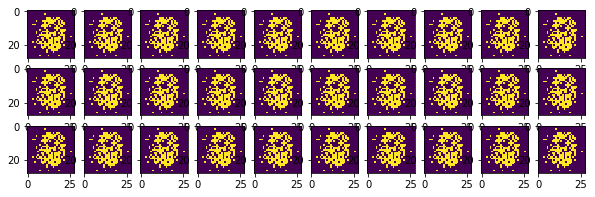

epoch: 9 	 last batch loss D: 0.0009355719084851444 	 last batch loss G: 10.893928527832031


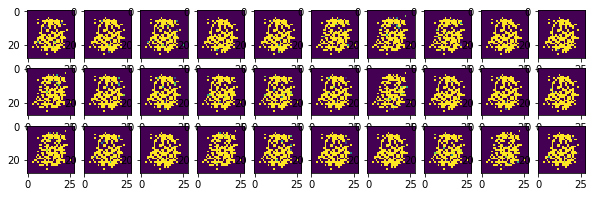

epoch: 10 	 last batch loss D: 0.0001294623507419601 	 last batch loss G: 11.061124801635742


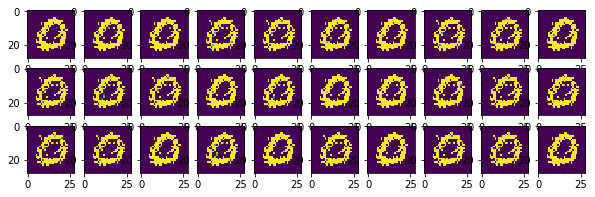

epoch: 11 	 last batch loss D: 0.00013702794967684895 	 last batch loss G: 16.261457443237305


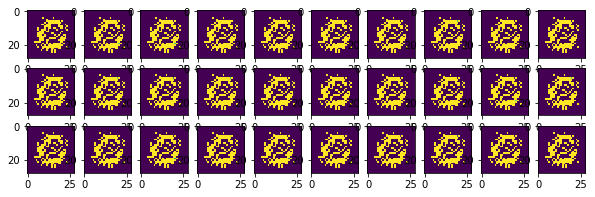

epoch: 12 	 last batch loss D: 0.12410825490951538 	 last batch loss G: 31.089637756347656


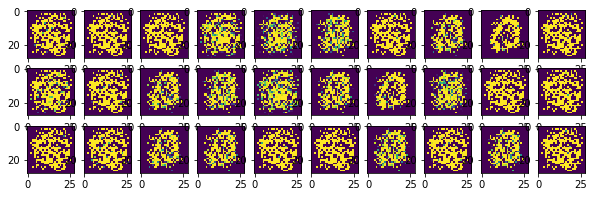

epoch: 13 	 last batch loss D: 6.306794239208102e-05 	 last batch loss G: 14.53472900390625


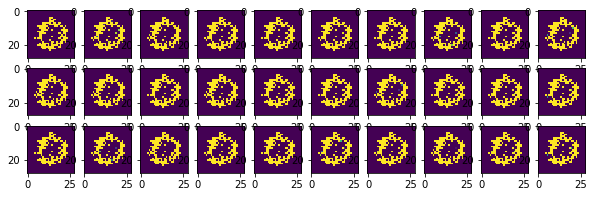

epoch: 14 	 last batch loss D: 1.0878768080146983e-05 	 last batch loss G: 18.285863876342773


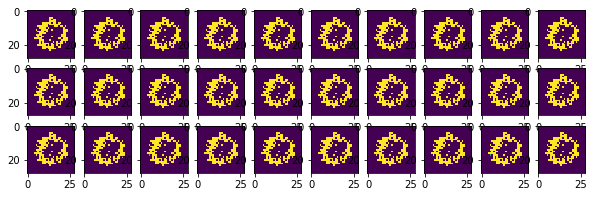

epoch: 15 	 last batch loss D: 2.132761210305034e-06 	 last batch loss G: 31.85024642944336


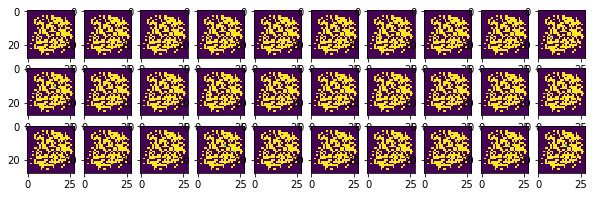

epoch: 16 	 last batch loss D: 1.3976115951663814e-05 	 last batch loss G: 15.494632720947266


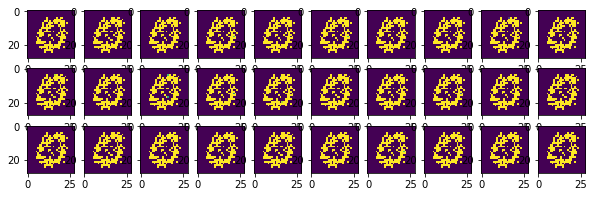

epoch: 17 	 last batch loss D: 1.3895604524805094e-06 	 last batch loss G: 28.456750869750977


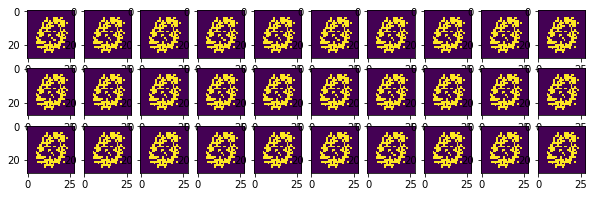

epoch: 18 	 last batch loss D: 2.939383648481453e-06 	 last batch loss G: 21.875797271728516


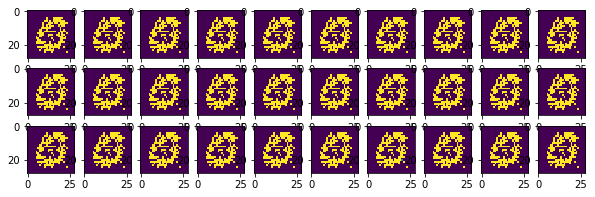

epoch: 19 	 last batch loss D: 1.4901161193847656e-08 	 last batch loss G: 25.603389739990234


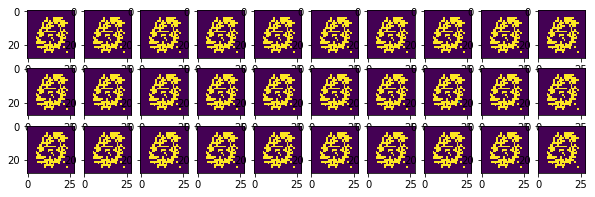

epoch: 20 	 last batch loss D: 4.3958695528090175e-07 	 last batch loss G: 23.752944946289062


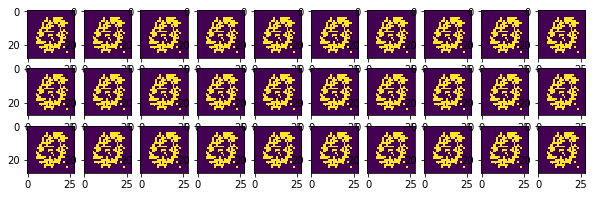

epoch: 21 	 last batch loss D: 1.62050341145914e-07 	 last batch loss G: 25.53620147705078


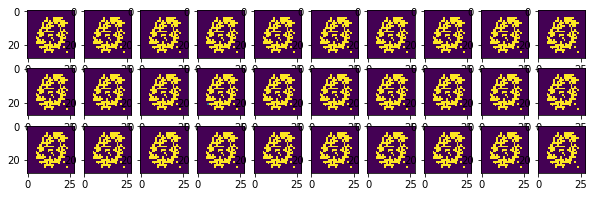

epoch: 22 	 last batch loss D: 0.006569521501660347 	 last batch loss G: 7.501621246337891


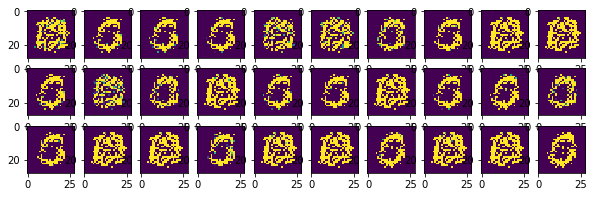

epoch: 23 	 last batch loss D: 0.0014127031899988651 	 last batch loss G: 14.098762512207031


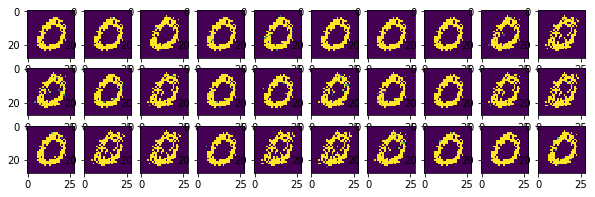

epoch: 24 	 last batch loss D: 0.003973949700593948 	 last batch loss G: 16.7106990814209


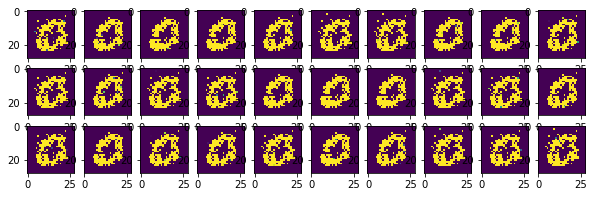

epoch: 25 	 last batch loss D: 0.0004606555448845029 	 last batch loss G: 12.973846435546875


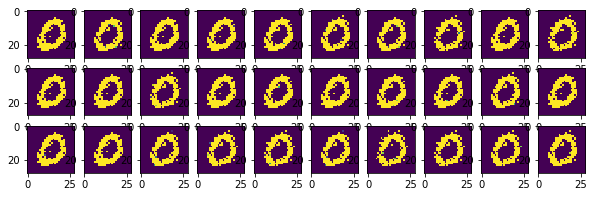

epoch: 26 	 last batch loss D: 1.6920253983698785e-05 	 last batch loss G: 17.47295379638672


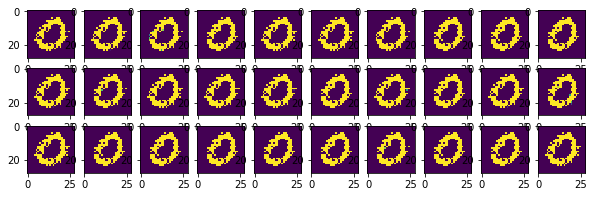

epoch: 27 	 last batch loss D: 2.065706212306395e-06 	 last batch loss G: 19.88133430480957


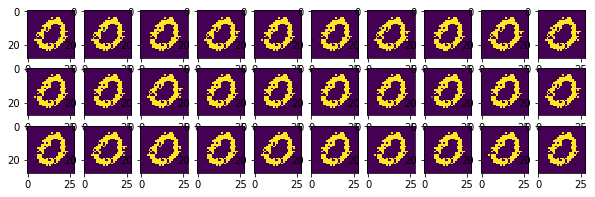

epoch: 28 	 last batch loss D: 1.488366524426965e-05 	 last batch loss G: 17.404891967773438


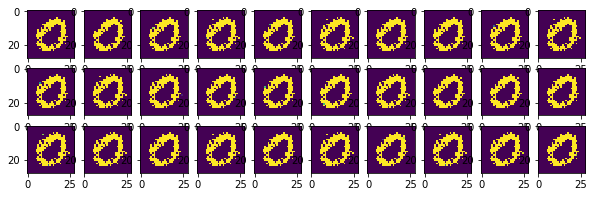

epoch: 29 	 last batch loss D: 6.416341057047248e-05 	 last batch loss G: 19.100589752197266


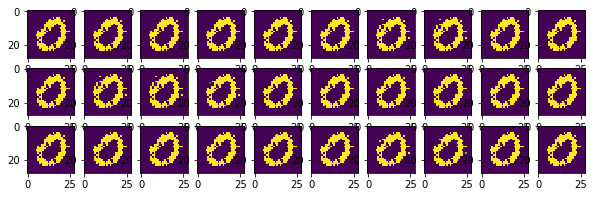

epoch: 30 	 last batch loss D: 1.5459976054899016e-07 	 last batch loss G: 20.48984718322754


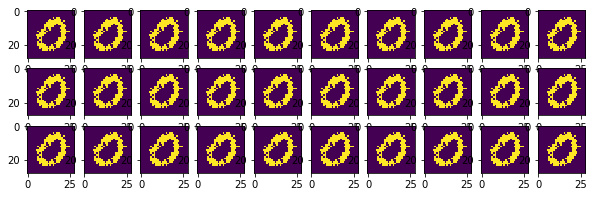

epoch: 31 	 last batch loss D: 2.849859015441325e-07 	 last batch loss G: 22.420223236083984


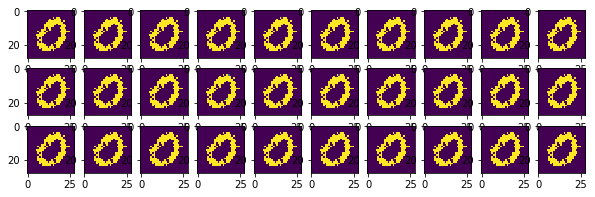

epoch: 32 	 last batch loss D: 0.0016360922018066049 	 last batch loss G: 9.263168334960938


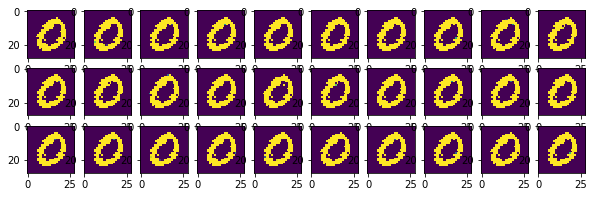

epoch: 33 	 last batch loss D: 1.1331853784213308e-05 	 last batch loss G: 18.222442626953125


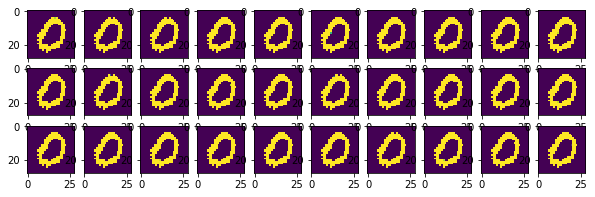

epoch: 34 	 last batch loss D: 1.2107200575428578e-07 	 last batch loss G: 21.977325439453125


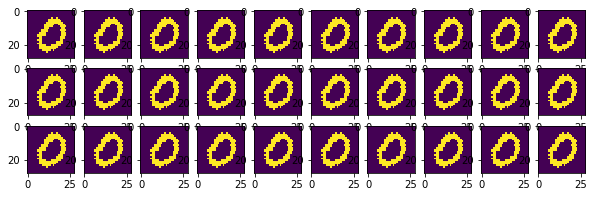

epoch: 35 	 last batch loss D: 0.16077129542827606 	 last batch loss G: 29.948780059814453


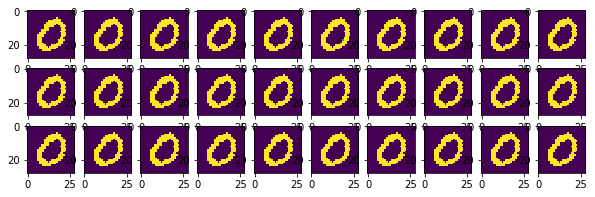

epoch: 36 	 last batch loss D: 0.0003333927015773952 	 last batch loss G: 12.00175666809082


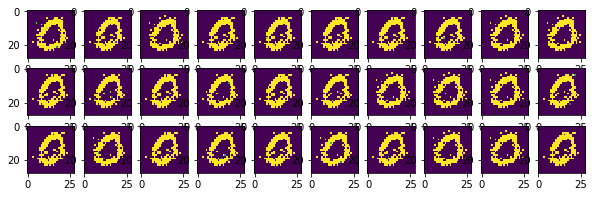

epoch: 37 	 last batch loss D: 8.5538031271426e-06 	 last batch loss G: 17.93088150024414


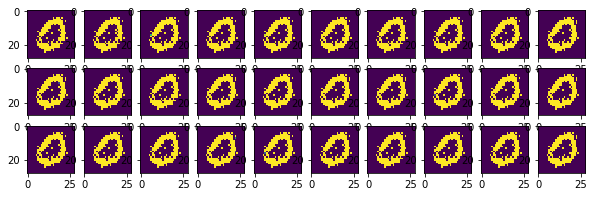

epoch: 38 	 last batch loss D: 9.834838010647218e-07 	 last batch loss G: 20.710716247558594


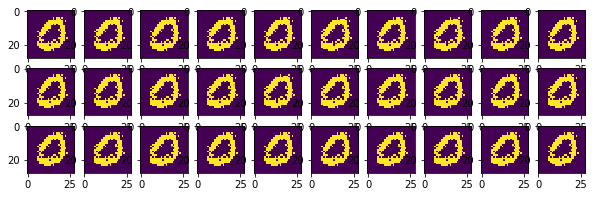

epoch: 39 	 last batch loss D: 4.7111810999922454e-05 	 last batch loss G: 13.4596586227417


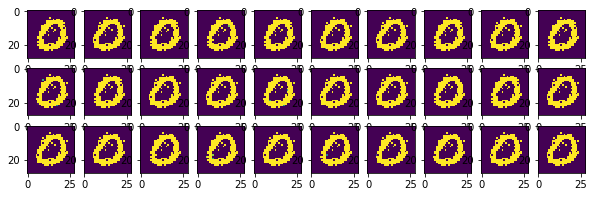

epoch: 40 	 last batch loss D: 0.0019779407884925604 	 last batch loss G: 11.33742618560791


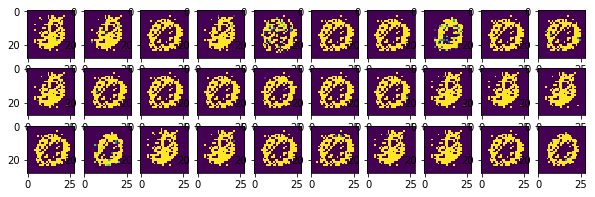

epoch: 41 	 last batch loss D: 0.014877197332680225 	 last batch loss G: 12.872177124023438


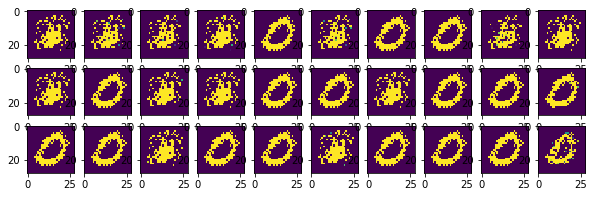

epoch: 42 	 last batch loss D: 0.0012534239795058966 	 last batch loss G: 10.907552719116211


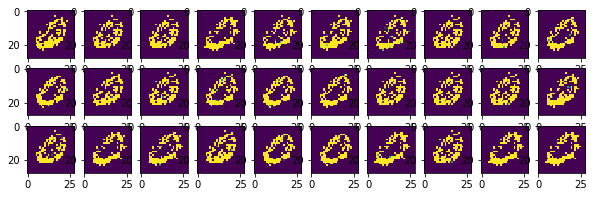

epoch: 43 	 last batch loss D: 2.741918933679699e-06 	 last batch loss G: 19.697444915771484


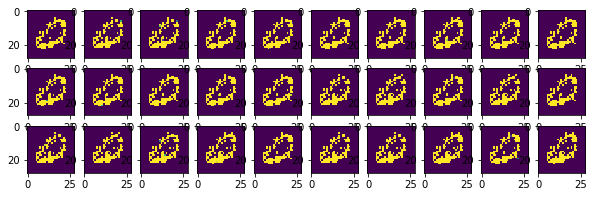

epoch: 44 	 last batch loss D: 0.00041316874558106065 	 last batch loss G: 12.56585693359375


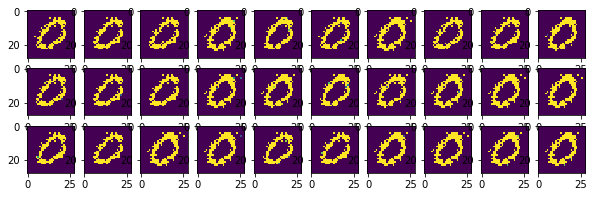

epoch: 45 	 last batch loss D: 2.003206463996321e-05 	 last batch loss G: 16.046478271484375


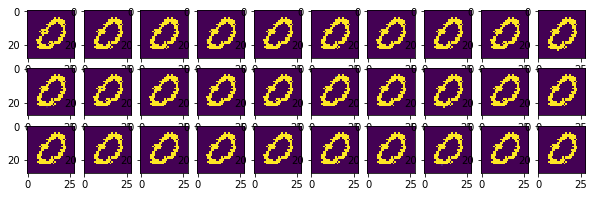

epoch: 46 	 last batch loss D: 5.429733391792979e-06 	 last batch loss G: 16.91197967529297


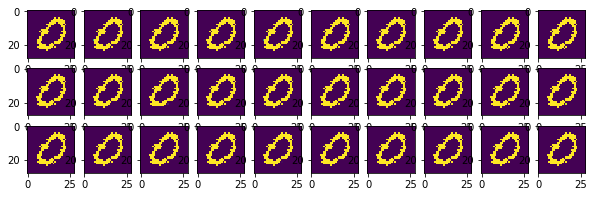

epoch: 47 	 last batch loss D: 3.1628255783289205e-06 	 last batch loss G: 18.71430206298828


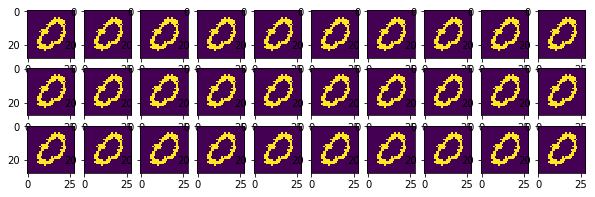

epoch: 48 	 last batch loss D: 0.0001421411579940468 	 last batch loss G: 12.98831558227539


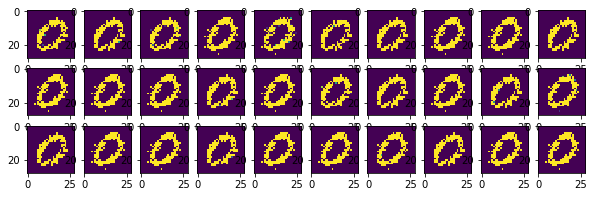

epoch: 49 	 last batch loss D: 0.00015292099851649255 	 last batch loss G: 16.4875431060791


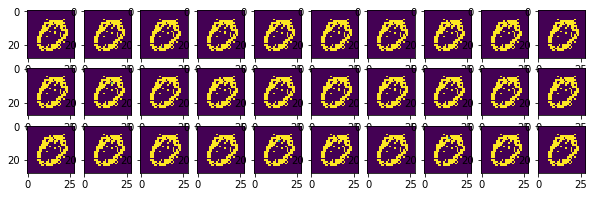

epoch: 50 	 last batch loss D: 4.097828991689312e-07 	 last batch loss G: 23.456064224243164


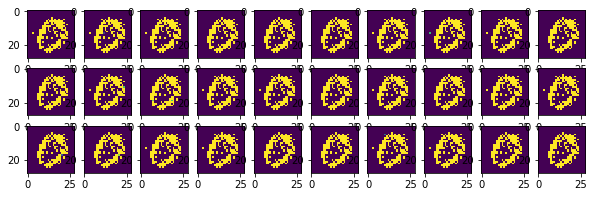

epoch: 51 	 last batch loss D: 0.00015653317677788436 	 last batch loss G: 16.701065063476562


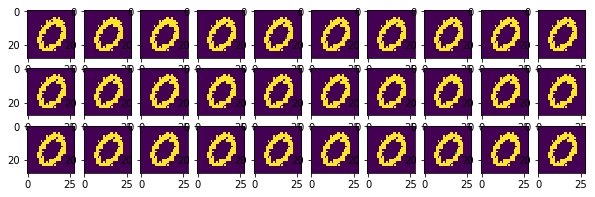

epoch: 52 	 last batch loss D: 3.2596364007986267e-07 	 last batch loss G: 20.58681869506836


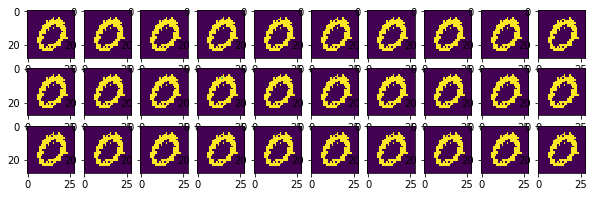

epoch: 53 	 last batch loss D: 2.0116603138831124e-07 	 last batch loss G: 21.899410247802734


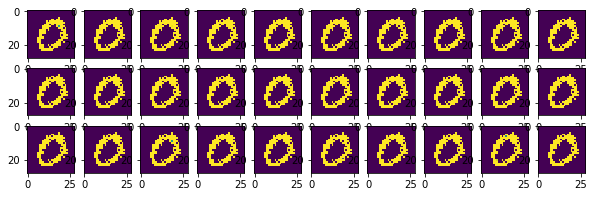

epoch: 54 	 last batch loss D: 3.8521852729900274e-06 	 last batch loss G: 27.36650848388672


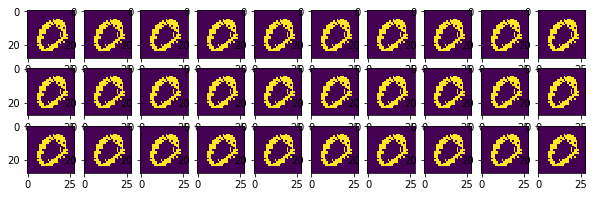

epoch: 55 	 last batch loss D: 0.03402591496706009 	 last batch loss G: 14.799959182739258


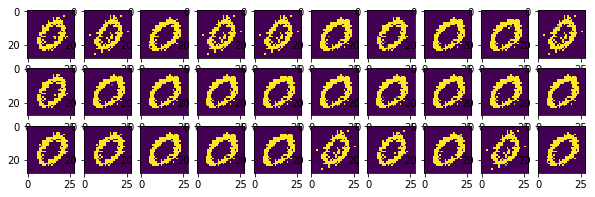

epoch: 56 	 last batch loss D: 0.0001759142760420218 	 last batch loss G: 18.046693801879883


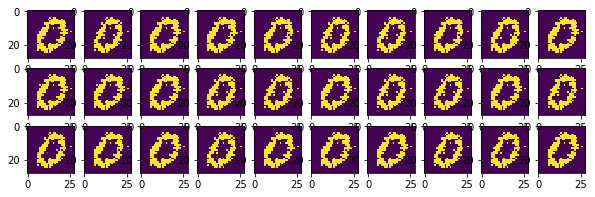

epoch: 57 	 last batch loss D: 7.711410034971777e-07 	 last batch loss G: 18.869657516479492


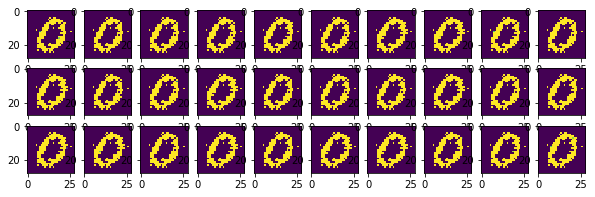

epoch: 58 	 last batch loss D: 2.0601521555363433e-06 	 last batch loss G: 29.101282119750977


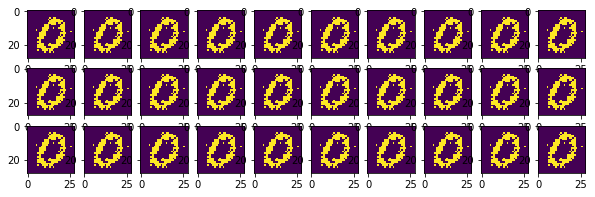

epoch: 59 	 last batch loss D: 5.0994032790185884e-05 	 last batch loss G: 26.353946685791016


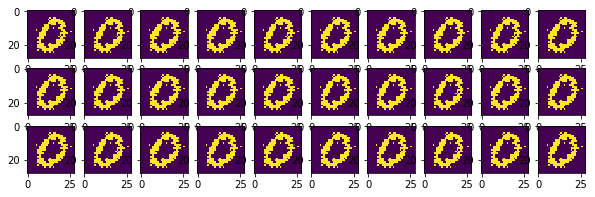

epoch: 60 	 last batch loss D: 0.0038655411917716265 	 last batch loss G: 10.255559921264648


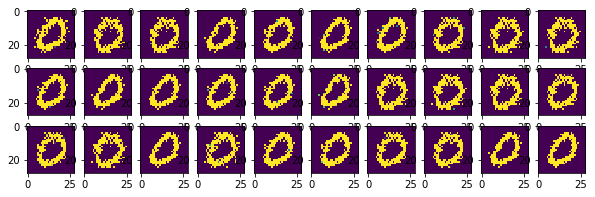

epoch: 61 	 last batch loss D: 7.581925456179306e-05 	 last batch loss G: 22.585119247436523


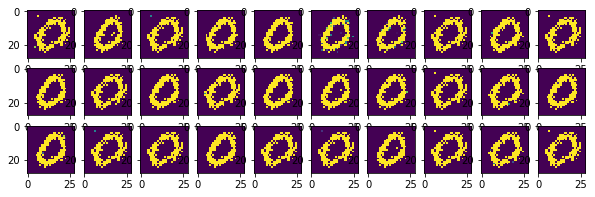

epoch: 62 	 last batch loss D: 0.00017063444829545915 	 last batch loss G: 15.357148170471191


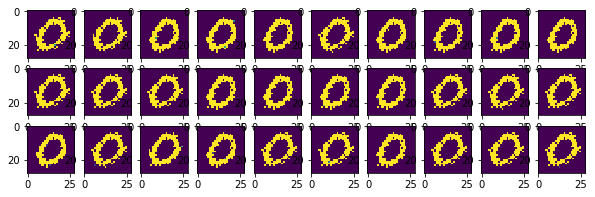

epoch: 63 	 last batch loss D: 7.599682021464105e-07 	 last batch loss G: 24.28807830810547


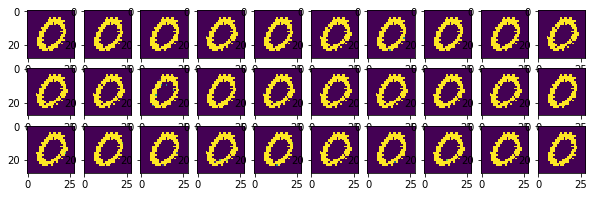

epoch: 64 	 last batch loss D: 0.0036417231895029545 	 last batch loss G: 14.503561019897461


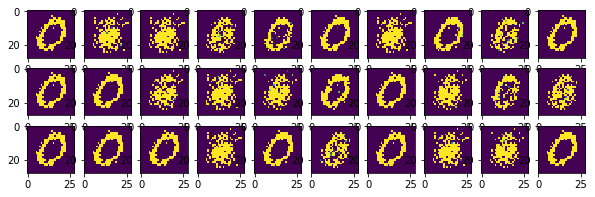

epoch: 65 	 last batch loss D: 0.0004407013766467571 	 last batch loss G: 19.111286163330078


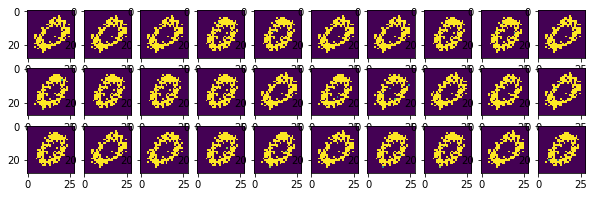

epoch: 66 	 last batch loss D: 1.2037146007060073e-05 	 last batch loss G: 15.508552551269531


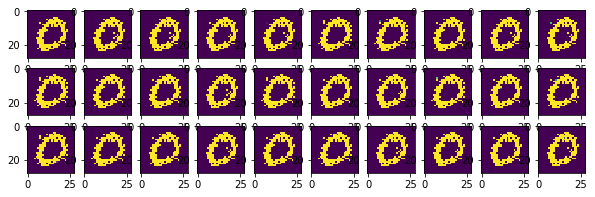

epoch: 67 	 last batch loss D: 0.003345814999192953 	 last batch loss G: 18.361865997314453


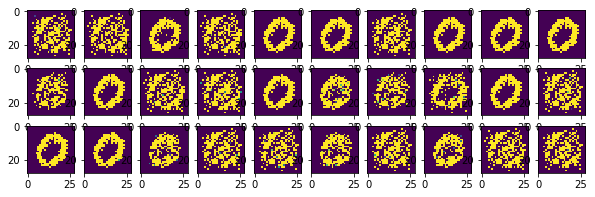

epoch: 68 	 last batch loss D: 0.018911022692918777 	 last batch loss G: 10.409322738647461


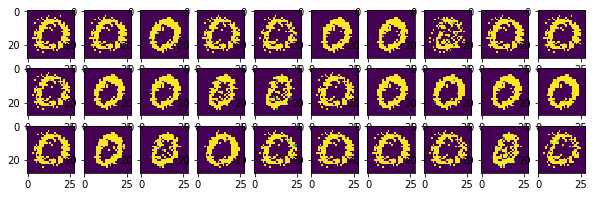

epoch: 69 	 last batch loss D: 0.03533084690570831 	 last batch loss G: 6.864208221435547


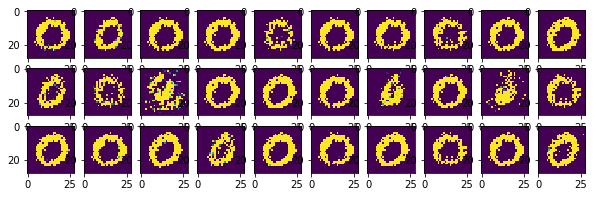

epoch: 70 	 last batch loss D: 0.09269046783447266 	 last batch loss G: 8.392149925231934


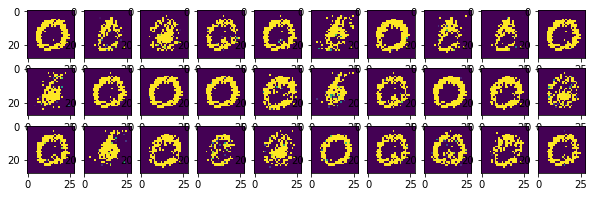

epoch: 71 	 last batch loss D: 0.19382378458976746 	 last batch loss G: 7.149825096130371


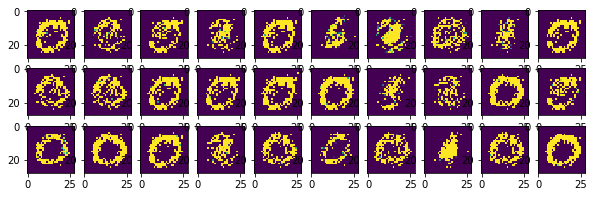

epoch: 72 	 last batch loss D: 0.033981695771217346 	 last batch loss G: 6.977625370025635


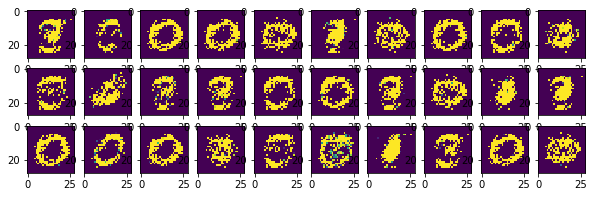

epoch: 73 	 last batch loss D: 0.2452492117881775 	 last batch loss G: 9.056876182556152


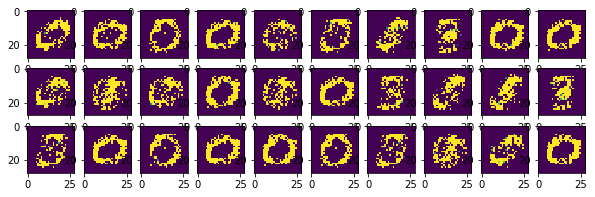

epoch: 74 	 last batch loss D: 0.06871446967124939 	 last batch loss G: 8.426351547241211


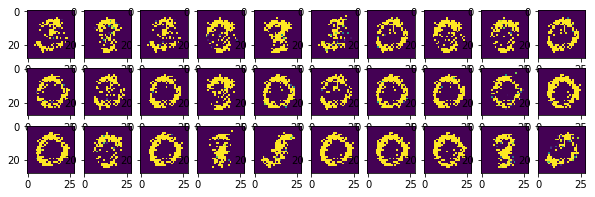

epoch: 75 	 last batch loss D: 0.12624090909957886 	 last batch loss G: 5.700531959533691


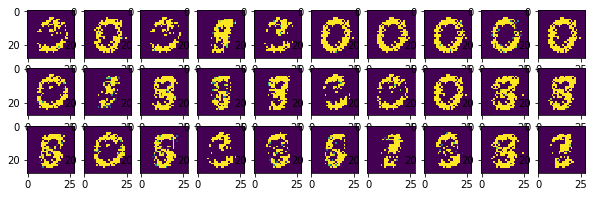

epoch: 76 	 last batch loss D: 0.39797279238700867 	 last batch loss G: 6.1296916007995605


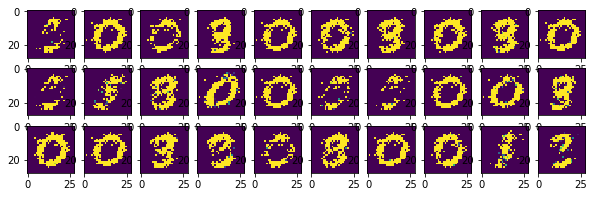

epoch: 77 	 last batch loss D: 0.08609981089830399 	 last batch loss G: 5.707549571990967


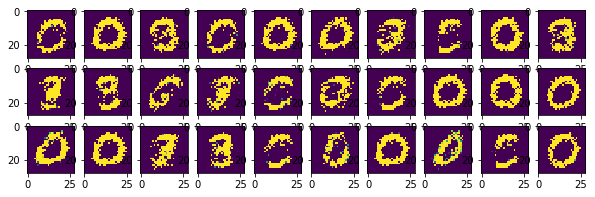

epoch: 78 	 last batch loss D: 0.14029420912265778 	 last batch loss G: 7.554903984069824


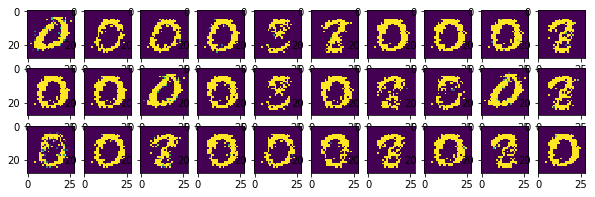

epoch: 79 	 last batch loss D: 0.32623380422592163 	 last batch loss G: 5.551668167114258


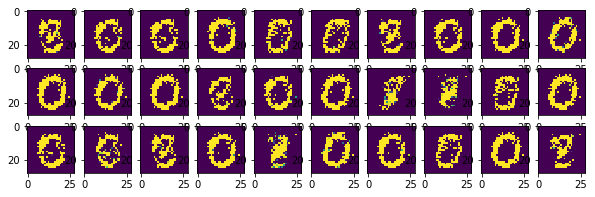

epoch: 80 	 last batch loss D: 0.1970113217830658 	 last batch loss G: 6.403515815734863


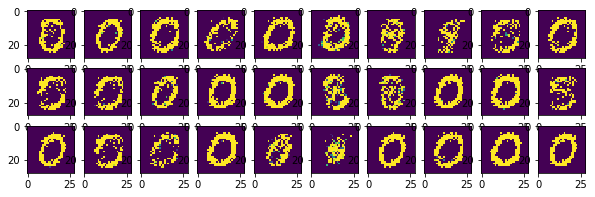

epoch: 81 	 last batch loss D: 0.07527443021535873 	 last batch loss G: 6.834956169128418


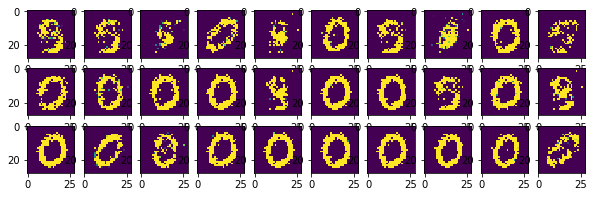

epoch: 82 	 last batch loss D: 0.16137295961380005 	 last batch loss G: 7.503442764282227


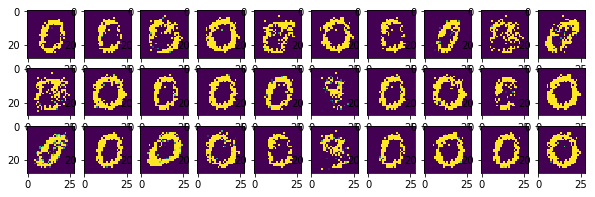

epoch: 83 	 last batch loss D: 0.16175350546836853 	 last batch loss G: 6.611059665679932


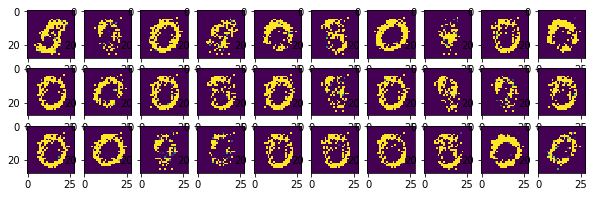

epoch: 84 	 last batch loss D: 0.12332861870527267 	 last batch loss G: 7.126399040222168


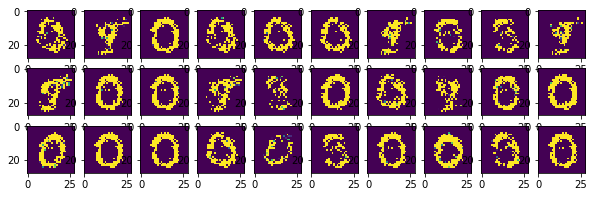

epoch: 85 	 last batch loss D: 0.10263765603303909 	 last batch loss G: 6.8166022300720215


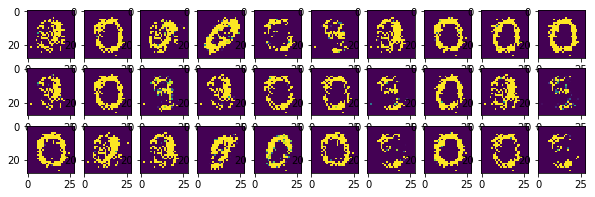

epoch: 86 	 last batch loss D: 0.17448724806308746 	 last batch loss G: 7.0385236740112305


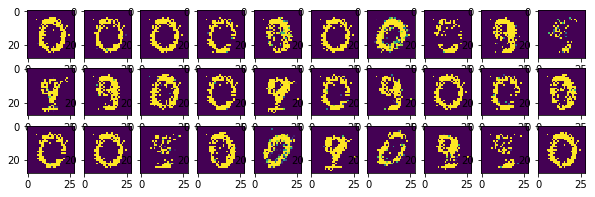

epoch: 87 	 last batch loss D: 0.2502918839454651 	 last batch loss G: 6.341807842254639


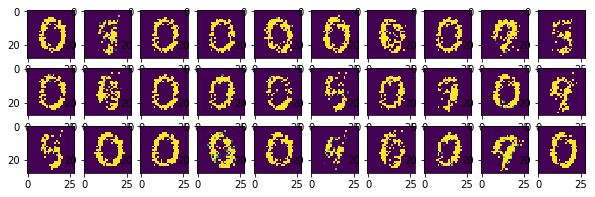

epoch: 88 	 last batch loss D: 0.05814046785235405 	 last batch loss G: 5.588179588317871


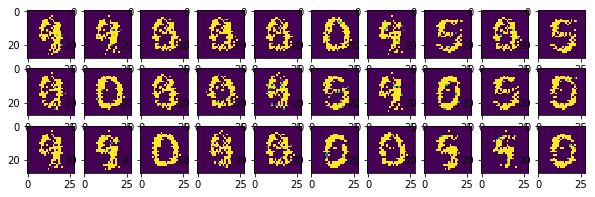

epoch: 89 	 last batch loss D: 0.03126341849565506 	 last batch loss G: 7.56498908996582


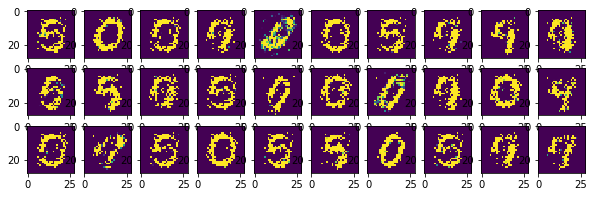

epoch: 90 	 last batch loss D: 0.3070225417613983 	 last batch loss G: 5.078896522521973


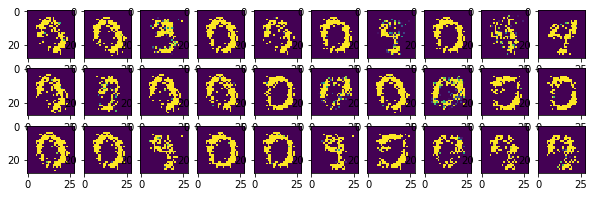

epoch: 91 	 last batch loss D: 0.06615185737609863 	 last batch loss G: 4.904420852661133


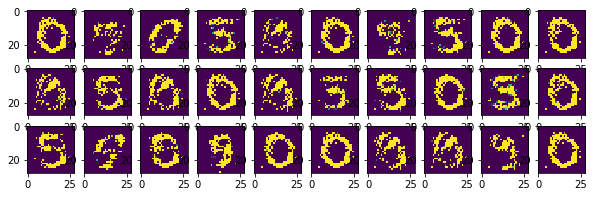

epoch: 92 	 last batch loss D: 0.3036121726036072 	 last batch loss G: 5.203151702880859


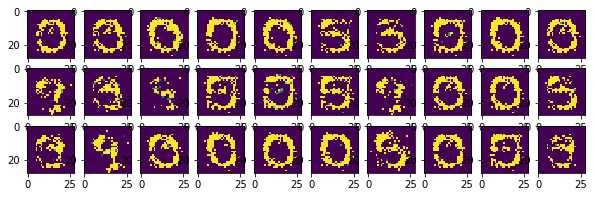

epoch: 93 	 last batch loss D: 0.2025580108165741 	 last batch loss G: 5.992574214935303


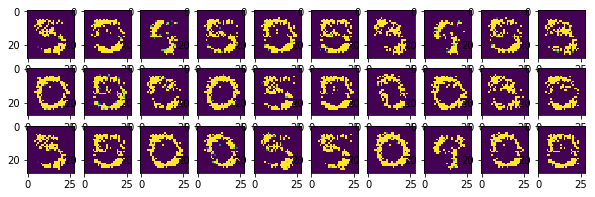

epoch: 94 	 last batch loss D: 0.11309794336557388 	 last batch loss G: 6.095410346984863


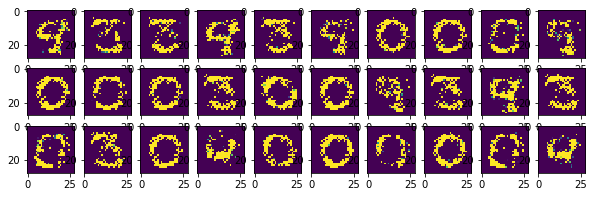

epoch: 95 	 last batch loss D: 0.13765516877174377 	 last batch loss G: 6.91274881362915


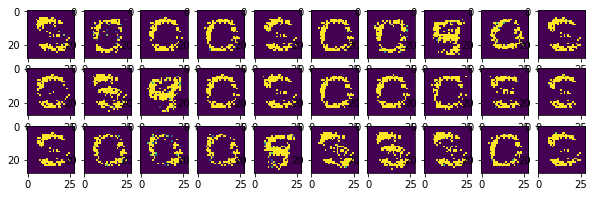

epoch: 96 	 last batch loss D: 0.06010010093450546 	 last batch loss G: 5.295159816741943


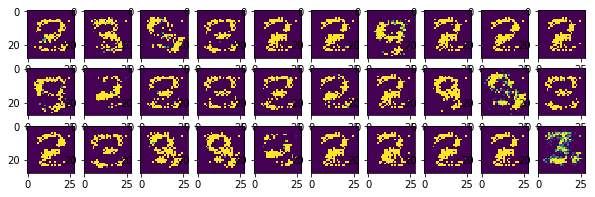

epoch: 97 	 last batch loss D: 0.1805495023727417 	 last batch loss G: 6.269338607788086


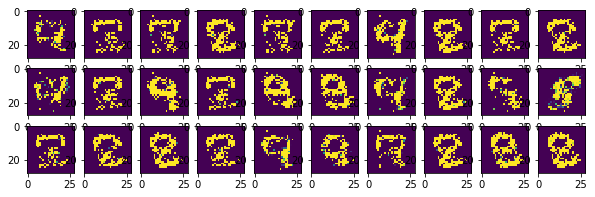

epoch: 98 	 last batch loss D: 0.3486681878566742 	 last batch loss G: 5.993437767028809


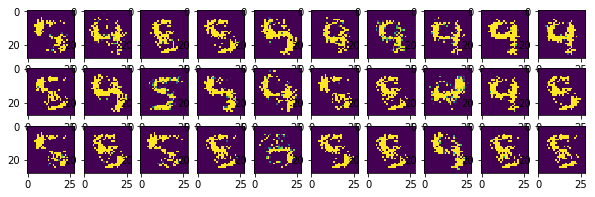

epoch: 99 	 last batch loss D: 0.17273759841918945 	 last batch loss G: 7.291923522949219


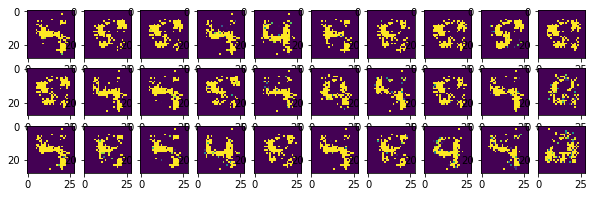

In [19]:
# [CHANGED] EPSILON is not needed anymore
# EPSILON = 1e-6

for epoch in range(N_EPOCH):
    for i, (img, label) in enumerate(train_loader):
        img = img.flatten(start_dim=1)

        real_img = img
        if CUDA:
            real_img = real_img.cuda()

        fake_labels = torch.zeros(img.shape[0], 1).cuda()
        real_labels = torch.ones(img.shape[0], 1).cuda()

        #########################
        #z = torch.randn(img.shape[0], 128)
        z = torch.FloatTensor(img.shape[0], 128).uniform_(0,1)
        if CUDA:
            z = z.cuda()
        fake_img = generator(z)

        opt_D.zero_grad()
        # [CHANGED] BCE is more stable
        #         loss_d = -(torch.log(EPSILON + 1 - discriminator(fake_img.detach())) + 
        #                    torch.log(EPSILON + discriminator(real_img))).mean()
        loss_d = (F.binary_cross_entropy(discriminator(fake_img.detach()), fake_labels) +
                  F.binary_cross_entropy(discriminator(real_img), real_labels))
        loss_d.backward()
        opt_D.step()
        #########################
        z = torch.randn(img.shape[0], 128)
        if CUDA:
          z = z.cuda()
        fake_img = generator(z)

        opt_G.zero_grad()
        # [CHANGED] BCE is more stable
        #     loss_g = - torch.log(EPSILON + discriminator(fake_img)).mean()
        loss_g = F.binary_cross_entropy(discriminator(fake_img), real_labels)
        loss_g.backward()
        opt_G.step()
        #########################

    
    print("epoch: {} \t last batch loss D: {} \t last batch loss G: {}".format(epoch, loss_d.item(), loss_g.item()))

    # [CHANGED] Better output
    for i in range(3):
        for j in range(10):
            plt.subplot(3, 10, i * 10 + j + 1)
            plt.imshow(fake_img[i * 10 + j].detach().cpu().view(28, 28).numpy())
    plt.show()
